## SPOTIFY ANALYSIS

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.


*track_name*: Name of the song

*artist(s)_name*: Name of the artist(s) of the song

*artist_count*: Number of artists contributing to the song

*released_year*: Year when the song was released

*released_month*: Month when the song was released

*released_day*: Day of the month when the song was released

*in_spotify_playlists*: Number of Spotify playlists the song is included in

*in_spotify_charts*: Presence and rank of the song on Spotify charts

*streams*: Total number of streams on Spotify

*in_apple_playlists*: Number of Apple Music playlists the song is included in

*in_apple_charts*: Presence and rank of the song on Apple Music charts

*in_deezer_playlists*: Number of Deezer playlists the song is included in

*in_deezer_charts*: Presence and rank of the song on Deezer charts

*in_shazam_charts*: Presence and rank of the song on Shazam charts

*bpm*: Beats per minute, a measure of song tempo

*key*: Key of the song

*mode*: Mode of the song (major or minor)

*danceability_%*: Percentage indicating how suitable the song is for dancing

*valence_%*: Positivity of the song's musical content

*energy_%*: Perceived energy level of the song

*acousticness_%*: Amount of acoustic sound in the song

*instrumentalness_%*: Amount of instrumental content in the song

*liveness_%*: Presence of live performance elements

*speechiness_%*: Amount of spoken words in the song

In [347]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df_org=pd.read_csv("spt.csv",encoding= 'unicode-escape')

In [348]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [349]:
df_org.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [350]:
# Find the unique values in key

df2=df_org["key"]
df2.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

**Cleaning Dataset**

In [351]:
# Checking if there are any duplicate rows

print("Number of duplicate rows: ", df_org.duplicated().sum())

Number of duplicate rows:  0


In [352]:
# To find the total number of null values in a specific column

print("Total Null values in 'in_shazam_charts' column: ", df_org['in_shazam_charts'].isnull().sum())

Total Null values in 'in_shazam_charts' column:  50


In [353]:
# Drop that column

df_org = df_org.drop('in_shazam_charts', axis=1)


In [354]:
# To find the total number of null values in 'key' column

print("Total Null values in 'key' column:", df_org['key'].isna().sum())

Total Null values in 'key' column: 95


In [355]:
#Drop the key column due to high number of null values

df_org = df_org.drop('key', axis=1)


In [356]:
#In 'in_deezer_playlist' (object type), there are comma values for integers greater than 999. Convert it into integer

df_org['in_deezer_playlists'] = df_org['in_deezer_playlists'].str.replace(',', '', regex=True).astype('int64')


In [357]:
df_org['in_deezer_playlists'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: in_deezer_playlists
Non-Null Count  Dtype
--------------  -----
953 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


In [358]:
#Renaming the column name of artist

df_org = df_org.rename(columns={'artist(s)_name': 'artists'})

In [359]:
#While analysing the data we found discrepancy in 'streams' column
#Checking a particular track name

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,0,110,Major,53,75,69,7,0,17,3


In [360]:
#change the stream value of particular song which is invalid

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = 211283228

In [361]:
#Checking if change has been applied

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,211283228,16,...,0,110,Major,53,75,69,7,0,17,3


In [362]:
#Change the datatype of stream from object to int

df_org['streams']=df_org['streams'].astype('int64')
df_org['streams'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype
--------------  -----
953 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


In [363]:
#Checking unique tracks

unique_track = df_org['track_name'].unique()
unique_track.sort()
print(unique_track)

["'Till I Collapse" '(It Goes Like) Nanana - Edit'
 '10 Things I Hate About You' '10:35' '2 Be Loved (Am I Ready)' '2055'
 '212' '25k jacket (feat. Lil Baby)' '295' '505' '69'
 'A Holly Jolly Christmas - Single Version' 'A Tale By Quincy'
 'A Tu Merced' 'A Veces (feat. Feid)' 'ALIEN SUPERSTAR' 'AM Remix'
 'AMARGURA' 'AMERICA HAS A PROBLEM (feat. Kendrick Lamar)' 'AMG'
 'ANTIFRAGILE' 'Abcdario' 'About Damn Time' 'Acapulco' 'Acrï¿½ï¿½s'
 'Adore You' 'Afraid To Feel' 'After Dark' 'After Hours' 'After LIKE'
 'Agosto' 'Aguacero' 'Agudo Mï¿½ï¿½gi' 'Ai Preto' "Ain't Shit"
 'Ainï¿½ï¿½ï¿½t Tha' 'Alien Blues'
 'All For Us - from the HBO Original Series Euphoria'
 'All I Want for Christmas Is You' 'All My Life (feat. J. Cole)'
 'All Of The Girls You Loved Before'
 'All The Way Live (Spider-Man: Across the Spider-Verse) (Metro Boomin & Future, Lil Uzi Vert)'
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)"
 'All of Me' 'Alone' 'Am I Dreaming (Metro Boomin & A$AP Rocky, Roise

In [364]:
#Checking rows with special characters

rows_with_special_characters = df_org[df_org.astype(str).apply(lambda row: any(('ý' in cell or 'ï¿' in cell) for cell in row), axis=1)]

print("Rows with special character:")
rows_with_special_characters


Rows with special character:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,1,123,Major,69,82,76,6,0,6,3
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,38,107,Major,80,82,80,43,0,14,4
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,9,150,Major,61,39,73,37,0,11,3
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,4,130,Major,86,59,96,50,1,9,5
63,BESO,"Rauw Alejandro, ROSALï¿½",2,2023,3,24,4053,50,357925728,82,...,12,95,Minor,77,53,64,74,0,17,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,0,122,Minor,55,46,64,0,0,17,10
913,XQ Te Pones Asï¿,"Yandel, Feid",2,2022,9,13,308,0,47093942,6,...,0,92,Major,81,48,70,13,0,15,7
915,Sin Seï¿½ï,"Ovy On The Drums, Quevedo",2,2022,7,22,1097,2,209106362,18,...,1,118,Minor,82,75,85,33,1,11,4
918,THE LONELIEST,Mï¿½ï¿½ne,1,2022,10,7,1585,5,225093344,78,...,1,130,Major,52,24,60,0,0,8,3


In [365]:
#Changing the track name where there are special unreadable characters

characters_to_replace = ['ý', 'ï', '¿', 'Â', '½', 'Ã', '¯']

for char in characters_to_replace:
    df_org['track_name'] = df_org['track_name'].str.replace(char, '')

df_org.head(10)


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [366]:
#Checking rows where track_name is empty or NULL

null_track_name_rows = df_org[df_org['track_name'].isnull() | (df_org['track_name'] == '')]
print("Rows with NULL or empty track_name:")
null_track_name_rows

Rows with NULL or empty track_name:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
174,,YOASOBI,1,2023,4,12,356,16,143573775,35,...,1,166,Major,57,84,94,11,0,37,9
374,,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,0,158,Minor,60,52,76,17,0,19,5


In [367]:
#Manually changing the track name

df_org.loc[374, 'track_name'] = 'Shinunoga E-Wa'
df_org.loc[174, 'track_name'] = 'Run Into The Night'
df_org.loc[[374, 174]]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
374,Shinunoga E-Wa,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,0,158,Minor,60,52,76,17,0,19,5
174,Run Into The Night,YOASOBI,1,2023,4,12,356,16,143573775,35,...,1,166,Major,57,84,94,11,0,37,9


In [368]:
#Checking artists with special characters

for char in characters_to_replace:
    char_present = df_org['artists'].str.contains(char)
    values_with_char = df_org['artists'][char_present]
    if not values_with_char.empty:
        print(f"Values with '{char}' in artist_name column:")
        print(values_with_char)

Values with 'ï' in artist_name column:
26                                   Rï¿½ï¿½ma, Selena G
63                              Rauw Alejandro, ROSALï¿½
112                            Jasiel Nuï¿½ï¿½ez, Peso P
118               Sebastian Yatra, Manuel Turizo, Beï¿½ï
146                            Bomba Estï¿½ï¿½reo, Bad B
210                                Junior H, Eden Muï¿½ï
212                                 Semicenk, Doï¿½ï¿½u 
231                                             Beyoncï¿
236                             Kendrick Lamar, Beyoncï¿
249                                 Zï¿½ï¿½ Neto & Crist
258                                 Rich The Kid, Matuï¿
278                                             ROSALï¿½
294                            Jasiel Nuï¿½ï¿½ez, Peso P
303                                  Tiï¿½ï¿½sto, Tate M
309                                   Marï¿½ï¿½lia Mendo
375                             Wisin & Yandel, ROSALï¿½
380                                             R

In [369]:
#Replacing special characters in artist name with #

for char in characters_to_replace:
    df_org['artists'] = df_org['artists'].str.replace(char, '#')

df_org.head(10)

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [370]:
#Checking if any NULL values are present

df_org.count()

track_name              953
artists                 953
artist_count            953
released_year           953
released_month          953
released_day            953
in_spotify_playlists    953
in_spotify_charts       953
streams                 953
in_apple_playlists      953
in_apple_charts         953
in_deezer_playlists     953
in_deezer_charts        953
bpm                     953
mode                    953
danceability_%          953
valence_%               953
energy_%                953
acousticness_%          953
instrumentalness_%      953
liveness_%              953
speechiness_%           953
dtype: int64

In [371]:
#Fixing artists of a particular track

df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\"", 'artists']="Jordan Fisher, Josh Levi, Finneas O'Connell, 4*TOWN, Topher Ngo, Grayson Vill"
df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\""]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
759,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6,2022,2,25,918,0,120847157,34,...,0,105,Minor,91,73,72,13,0,9,15


In [372]:
print("Number of tracks: ", df_org['track_name'].count())
print("Number of unique tracks: ", len(df_org.track_name.unique()))

Number of tracks:  953
Number of unique tracks:  943


**Dealing with Duplicate Elements**

In [373]:
#Finding duplicate tracks by checking track name & artist

duplicate = df_org[df_org.duplicated(['track_name', 'artists'], keep = 'first')]
duplicate

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,0,166,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,0,121,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,21,109,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,0,170,Major,56,52,64,11,0,45,7


In [374]:
#Drop duplicate elements from the data

df_org.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [375]:
#Resetting the index

df_org.reset_index(drop=True, inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [376]:
df_org.to_csv('sheet.csv')
df_copy = df_org.copy()

At this stage, the pre-processing is complete. Now we move on to identifying outliers and other analysis.

**Identifying Outliers**

In [377]:
#Removing columns with object type

columns_to_drop = ['track_name', 'artists', 'mode']
out_check = df_copy.drop(columns=columns_to_drop)

columns = out_check.columns

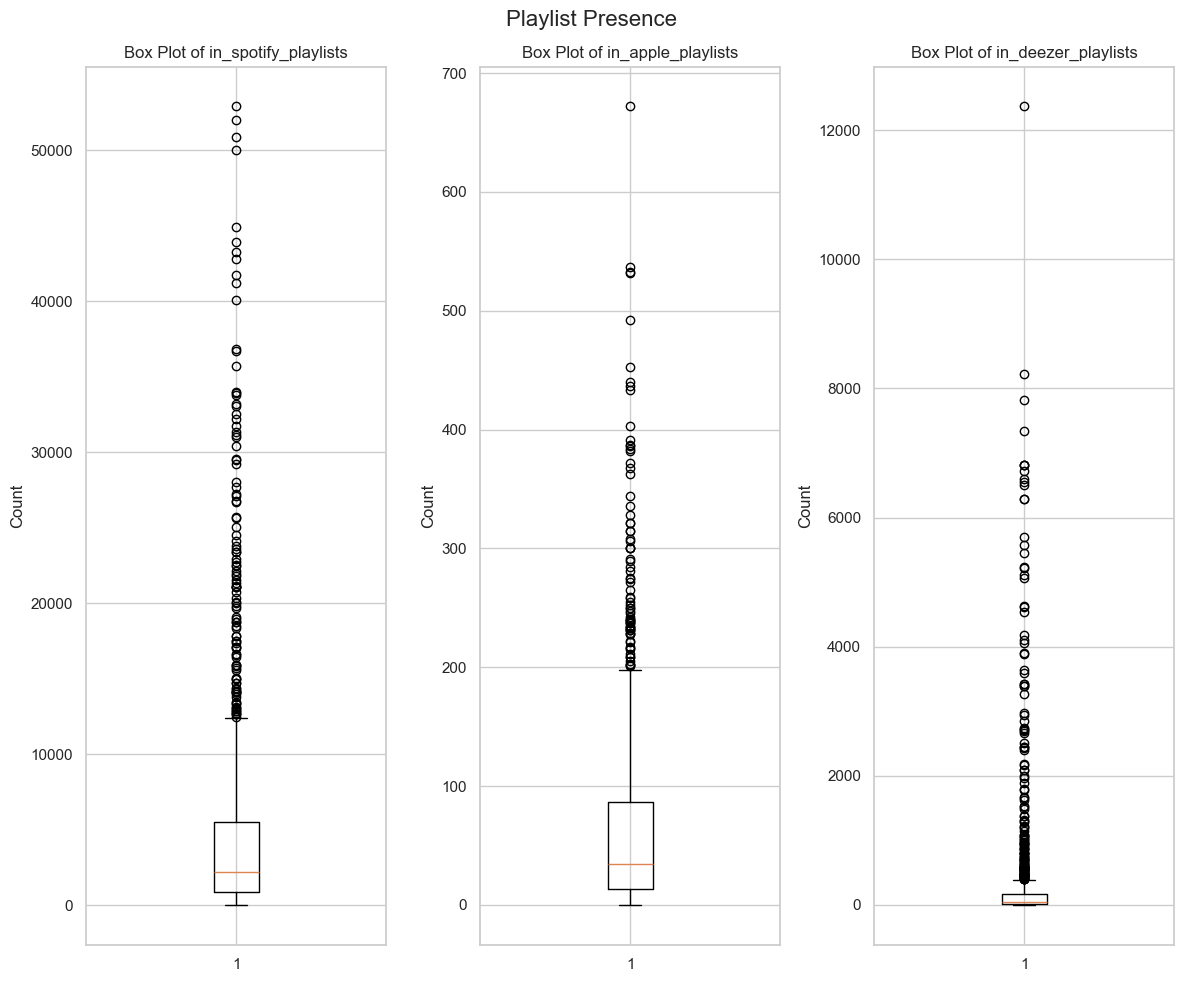

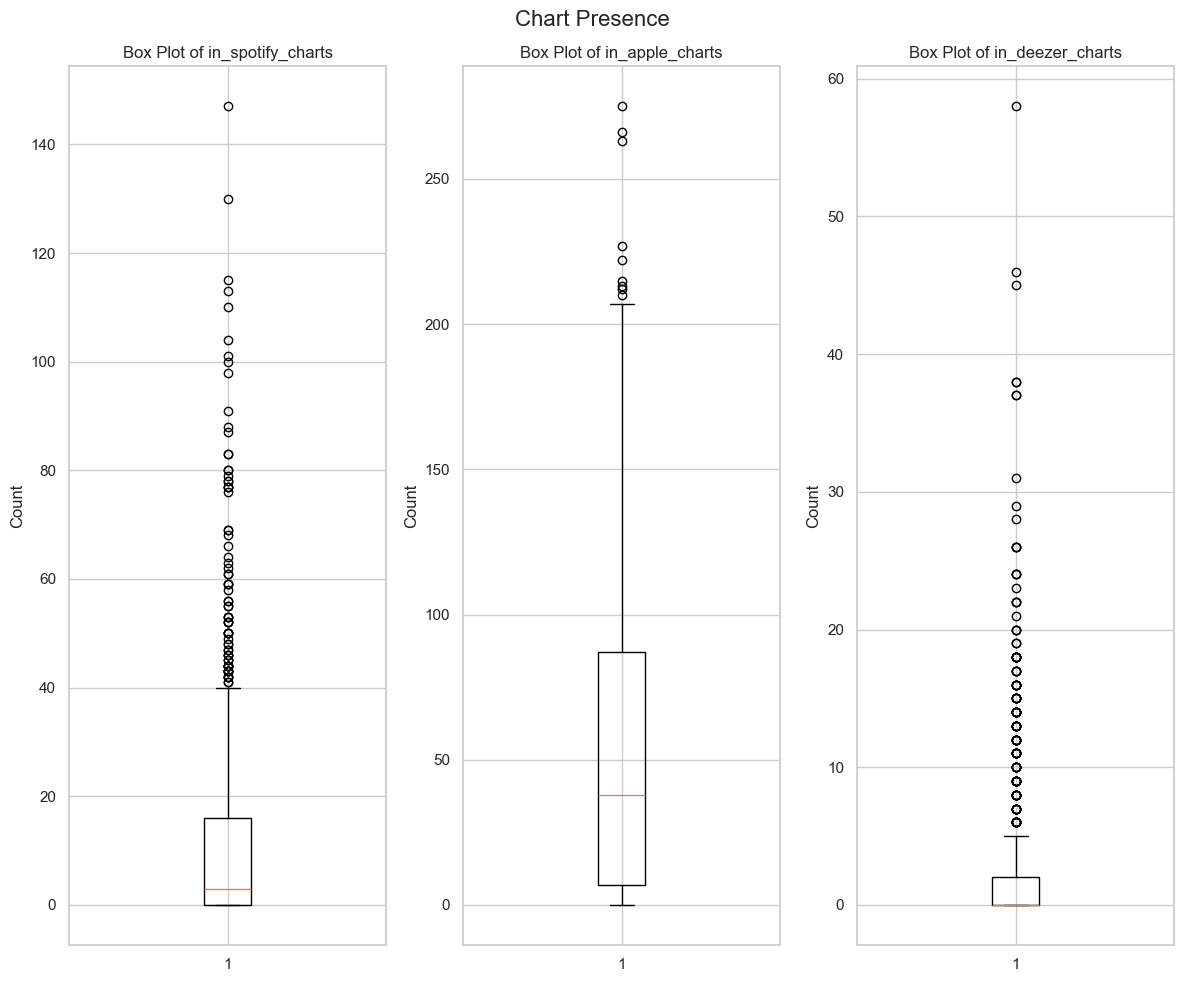

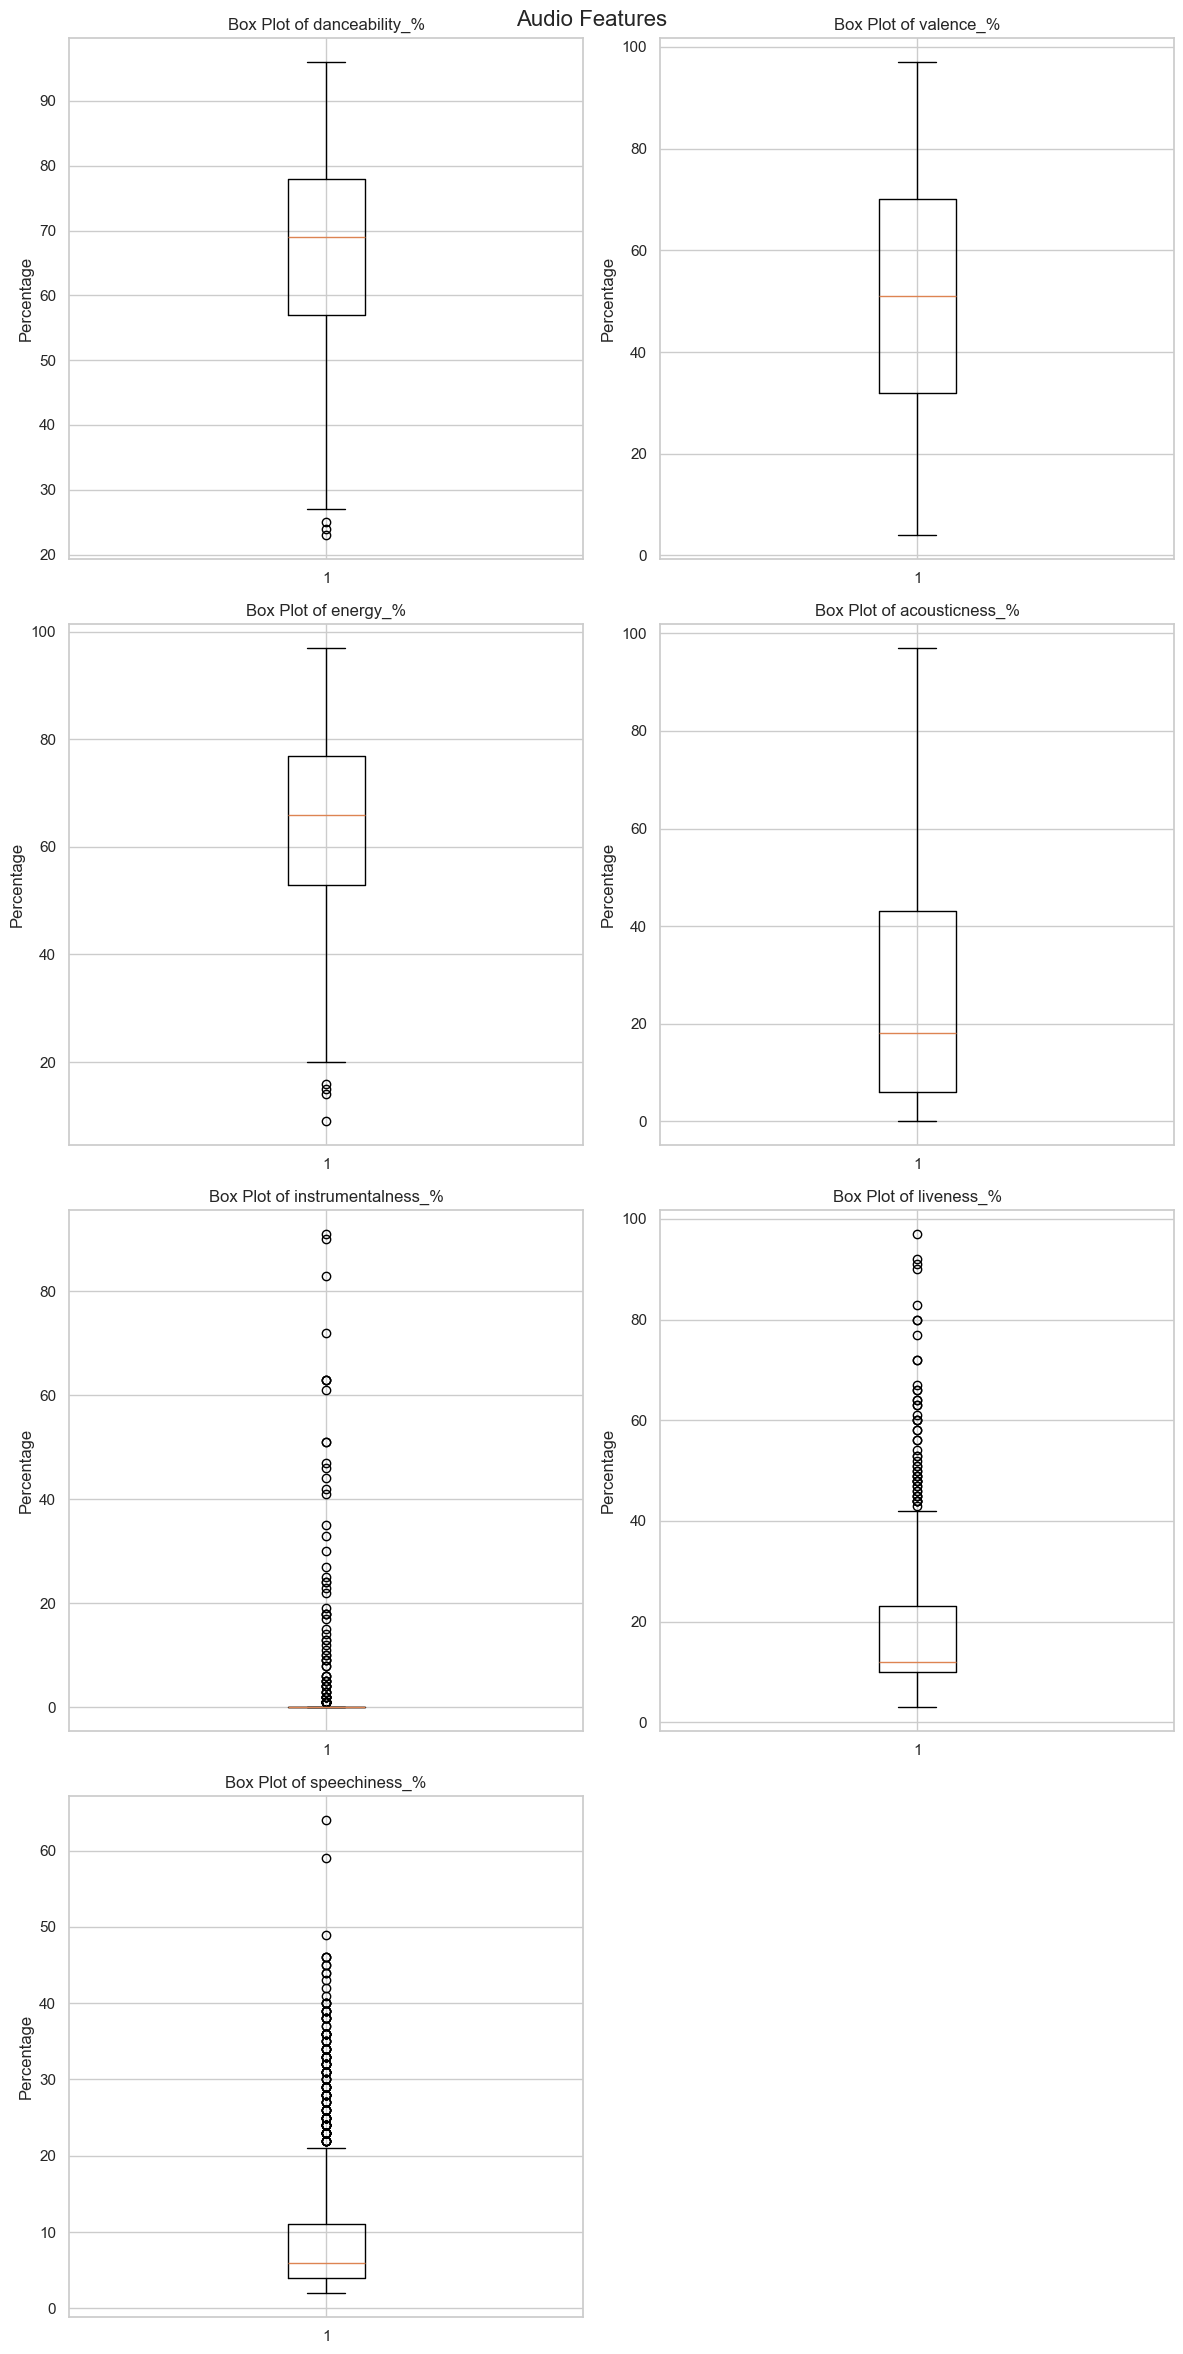

In [378]:
# Plot 1: Playlist presence

plt.figure(figsize=(12, 10))
plt.suptitle('Playlist Presence', fontsize=16)

for i, column in enumerate(['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 2: Chart presence
plt.figure(figsize=(12, 10))
plt.suptitle('Chart Presence', fontsize=16)

for i, column in enumerate(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 3: Audio features
plt.figure(figsize=(12, 24))
plt.suptitle('Audio Features', fontsize=16)

audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']

for i, column in enumerate(audio_features, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Percentage')

plt.tight_layout()
plt.show()



Playlist Presence

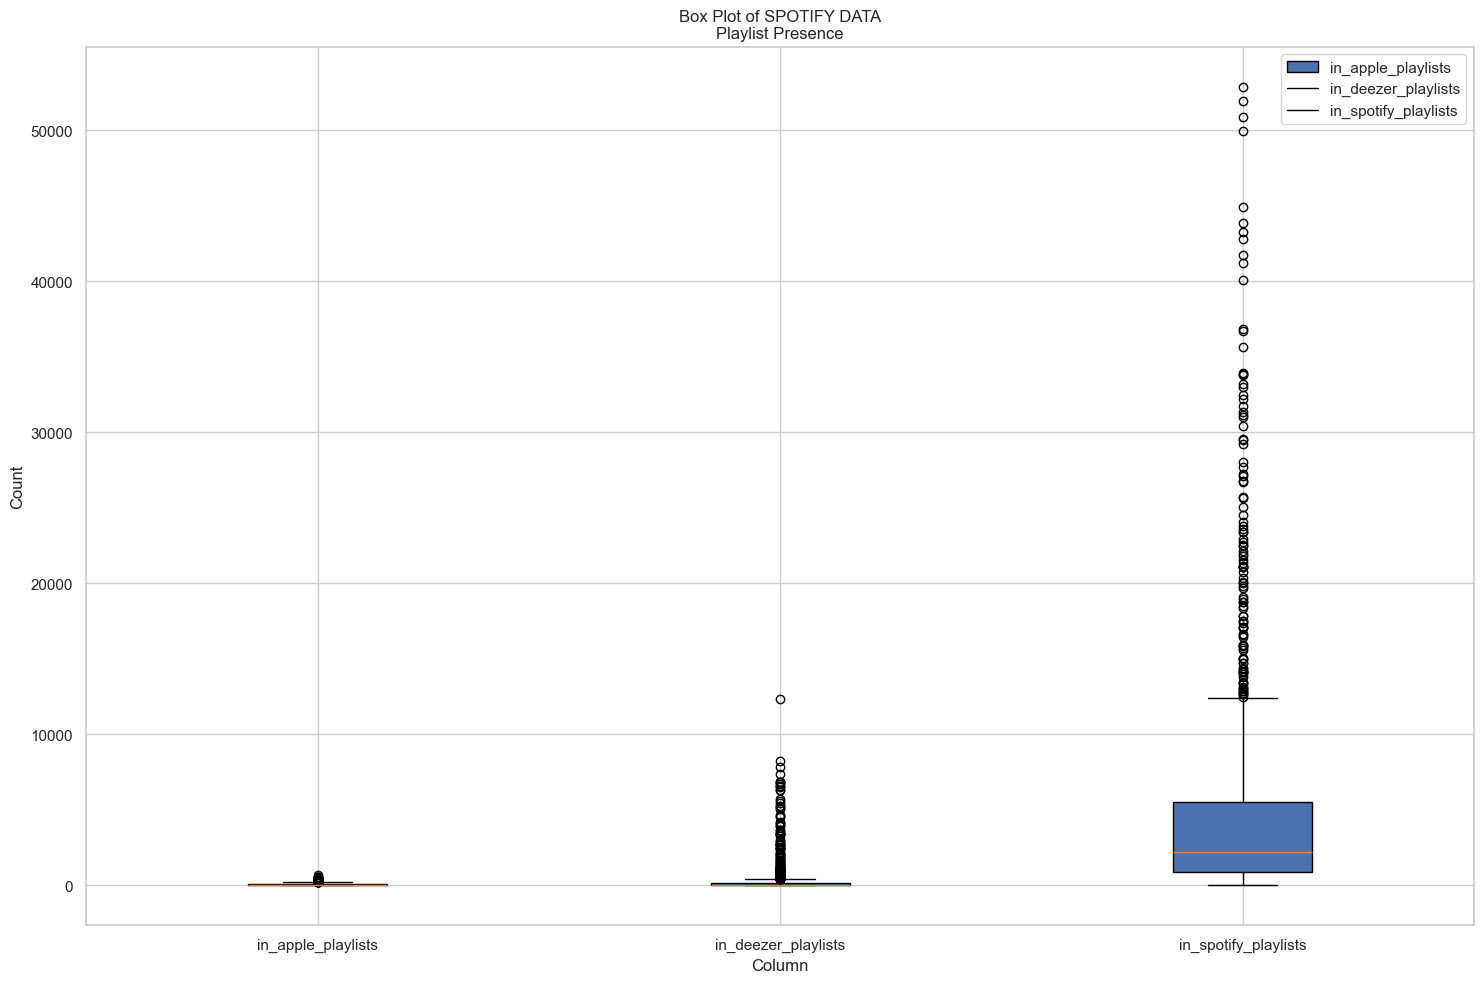

In [379]:
playList=out_check[['in_apple_playlists','in_deezer_playlists','in_spotify_playlists']]
playListColumn=playList.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nPlaylist Presence')
plt.boxplot(playList,patch_artist=True,labels=playListColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(playList)
plt.tight_layout()
plt.show()

Chart Presence

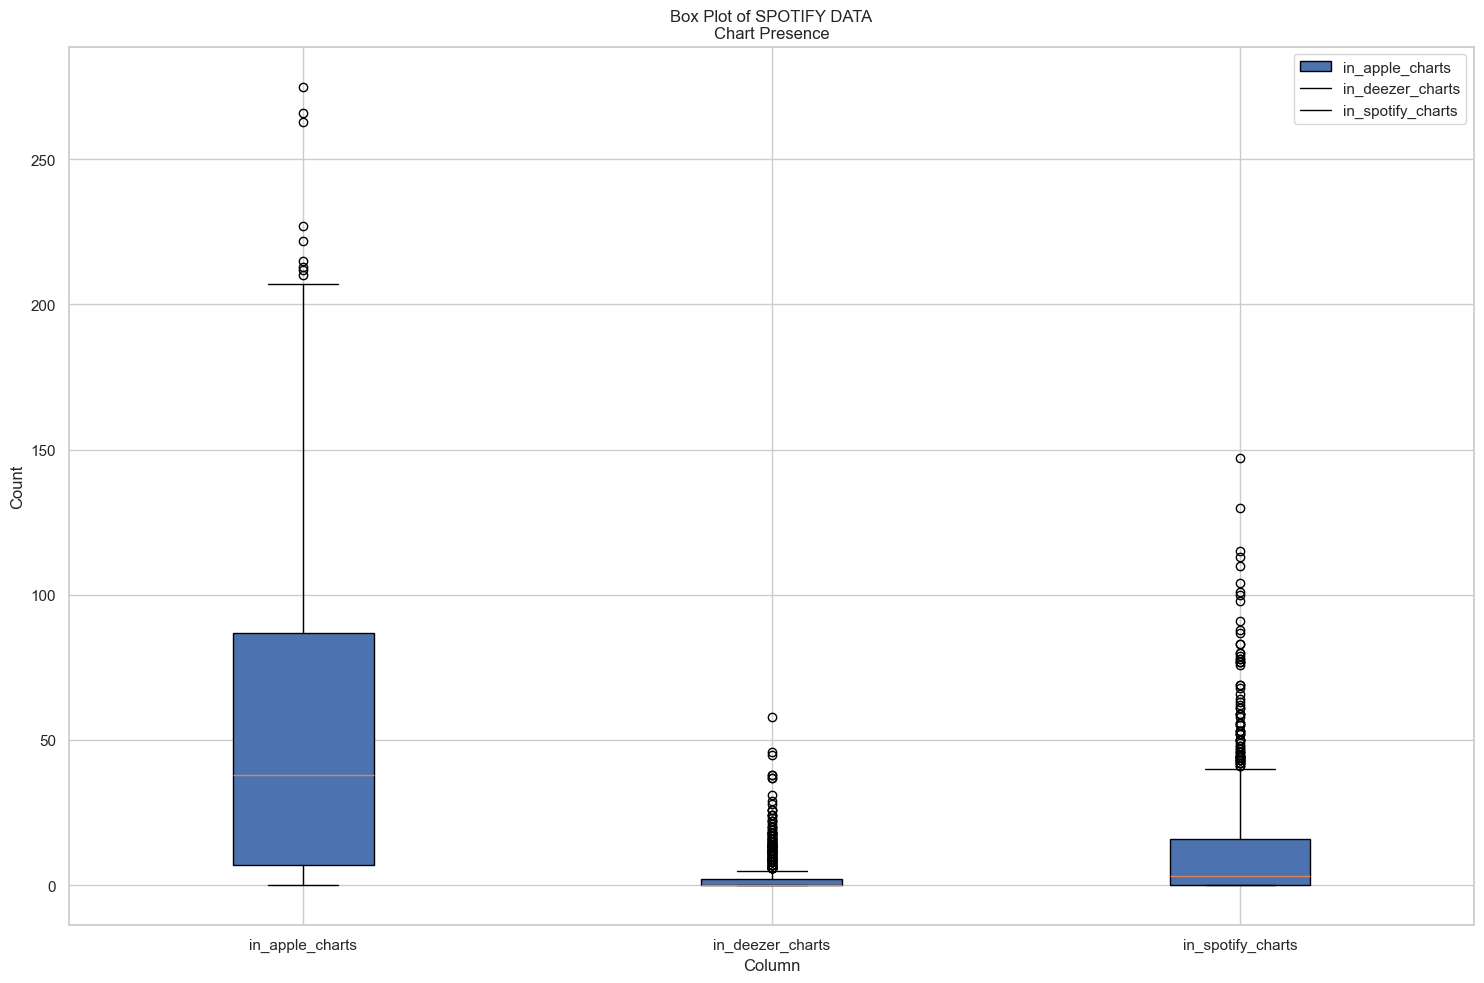

In [380]:
chartData=out_check[['in_apple_charts','in_deezer_charts','in_spotify_charts']]
chartColumn=chartData.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nChart Presence')
plt.boxplot(chartData,patch_artist=True,labels=chartColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(chartData)
plt.tight_layout()
plt.show()

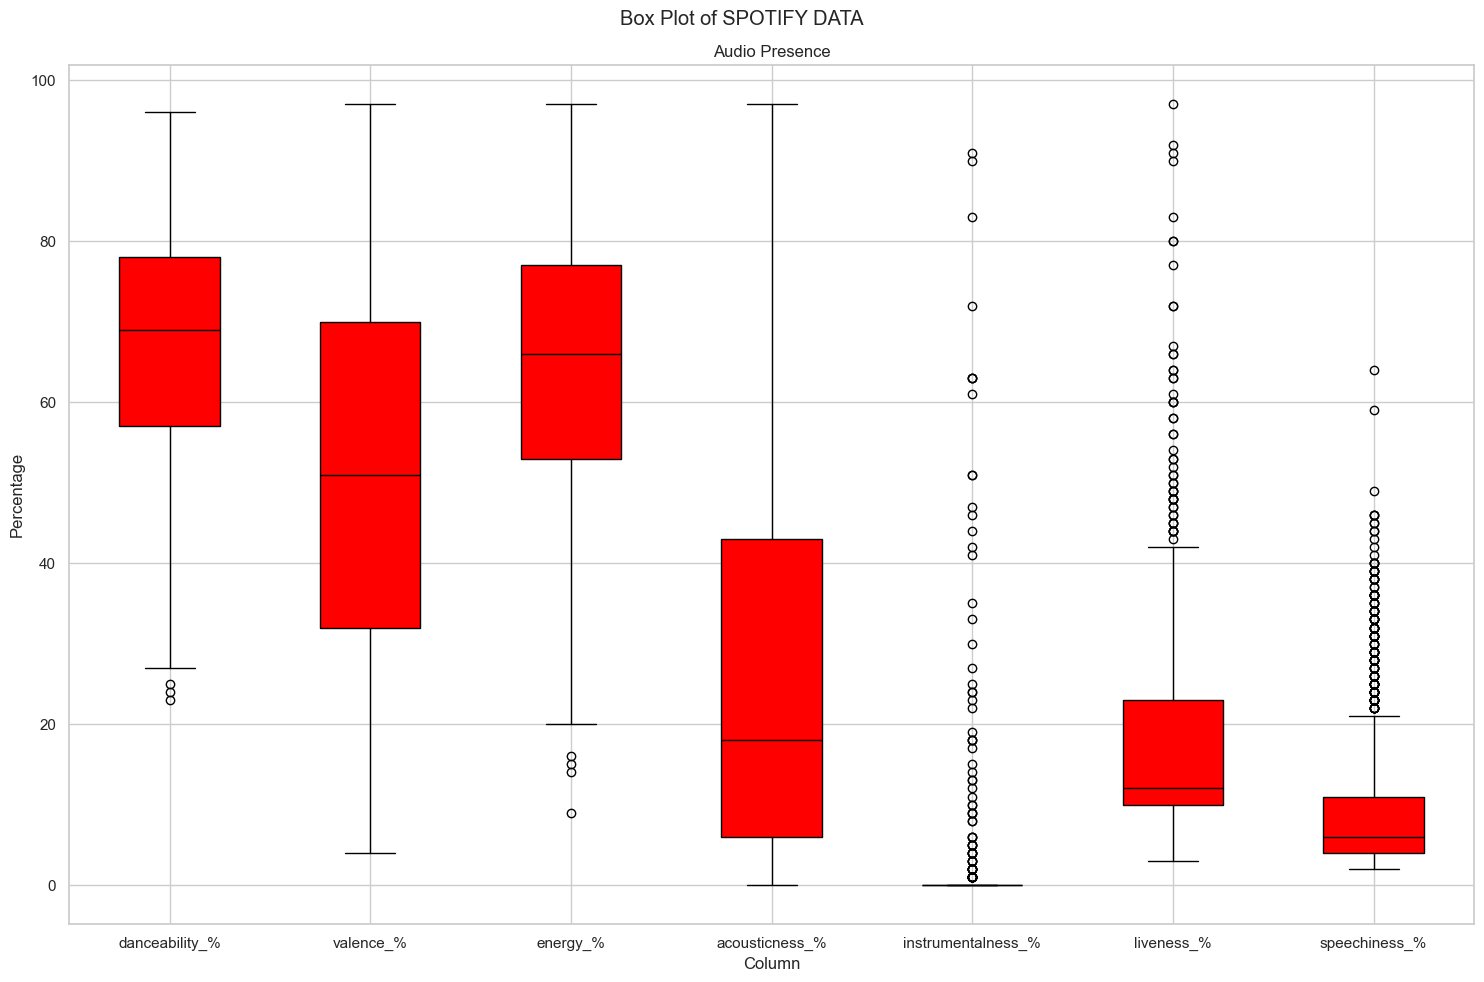

In [381]:
audioData=out_check[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']]
audioColumn=audioData.columns

plt.figure(figsize=(15,10))
plt.suptitle('Box Plot of SPOTIFY DATA')
plt.title('Audio Presence')
plt.boxplot(audioData,patch_artist=True,labels=audioColumn, boxprops=dict(facecolor='red'), medianprops=dict(color='black'))
plt.xlabel("Column")
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

Correlation

In [382]:
columns_to_keep = df_copy.columns.difference(['track_name','artists','mode'])
df_selected = df_copy[columns_to_keep]

df_selected.corr()

,acousticness_%,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_spotify_charts,in_spotify_playlists,instrumentalness_%,liveness_%,released_day,released_month,released_year,speechiness_%,streams,valence_%
acousticness_%,1.000000,-0.103193,-0.015911,-0.235695,-0.577620,-0.078015,-0.060478,-0.028498,-0.063894,-0.056996,-0.064744,0.044123,-0.049196,-0.004957,0.054995,-0.123371,-0.023718,-0.003990,-0.081174
artist_count,-0.103193,1.000000,-0.036736,0.208213,0.137745,-0.089889,-0.050162,-0.002622,-0.072063,-0.020151,-0.102341,-0.049324,0.044247,-0.016583,0.038237,0.088508,0.119070,-0.136074,0.128913
bpm,-0.015911,-0.036736,1.000000,-0.146077,0.026960,0.034593,0.027579,0.031301,-0.034515,0.036597,-0.017687,-0.004560,-0.002846,-0.034405,-0.039978,-0.006323,0.040278,-0.002024,0.041348
danceability_%,-0.235695,0.208213,-0.146077,1.000000,0.197446,-0.026018,-0.029060,0.067629,-0.071591,0.030890,-0.107594,-0.089764,-0.077316,0.049643,-0.047055,0.187230,0.185760,-0.105018,0.407971
energy_%,-0.577620,0.137745,0.026960,0.197446,1.000000,0.104290,0.050444,0.093337,0.064831,0.082488,0.033167,-0.037421,0.117111,0.052085,-0.083352,0.095090,-0.004486,-0.026532,0.357461
in_apple_charts,-0.078015,-0.089889,0.034593,-0.026018,0.104290,1.000000,0.414434,0.385549,0.173120,0.552238,0.270623,-0.010956,-0.016963,0.014108,-0.019106,-0.035249,-0.152243,0.321099,0.048119
in_apple_playlists,-0.060478,-0.050162,0.027579,-0.029060,0.050444,0.414434,1.000000,0.365641,0.473608,0.235488,0.709049,-0.055289,-0.050577,0.029617,0.000567,-0.200248,-0.107590,0.774422,0.055565
in_deezer_charts,-0.028498,-0.002622,0.031301,0.067629,0.093337,0.385549,0.365641,1.000000,0.066967,0.604918,0.143197,0.006890,-0.010917,0.074538,-0.003110,0.095249,-0.080518,0.228759,0.073965
in_deezer_playlists,-0.063894,-0.072063,-0.034515,-0.071591,0.064831,0.173120,0.473608,0.066967,1.000000,0.087954,0.826559,-0.016352,-0.026317,-0.083999,-0.088047,-0.306647,-0.062556,0.598384,-0.013683
in_spotify_charts,-0.056996,-0.020151,0.036597,0.030890,0.082488,0.552238,0.235488,0.604918,0.087954,1.000000,0.164284,-0.009125,-0.046400,0.022953,-0.047569,0.070567,-0.082803,0.246461,0.036355


In [383]:
#Finding high correlation

correlation_matrix = df_selected.corr()

high_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)]

high_correlations = (correlation_matrix.abs() >= 0.7) & (correlation_matrix.abs() < 1)

indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(correlation_matrix.shape[1]) if high_correlations.iloc[i, j]]

print("Indices of correlations greater than or equal to 0.7 or less than or equal to -0.7:")
print(indices)


Indices of correlations greater than or equal to 0.7 or less than or equal to -0.7:
[(6, 10), (6, 17), (8, 10), (10, 6), (10, 8), (10, 17), (17, 6), (17, 10)]


In [384]:
high_correlation_matrix

,acousticness_%,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_spotify_charts,in_spotify_playlists,instrumentalness_%,liveness_%,released_day,released_month,released_year,speechiness_%,streams,valence_%
acousticness_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709049,NaN,NaN,NaN,NaN,NaN,NaN,0.774422,NaN
in_deezer_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_deezer_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_spotify_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


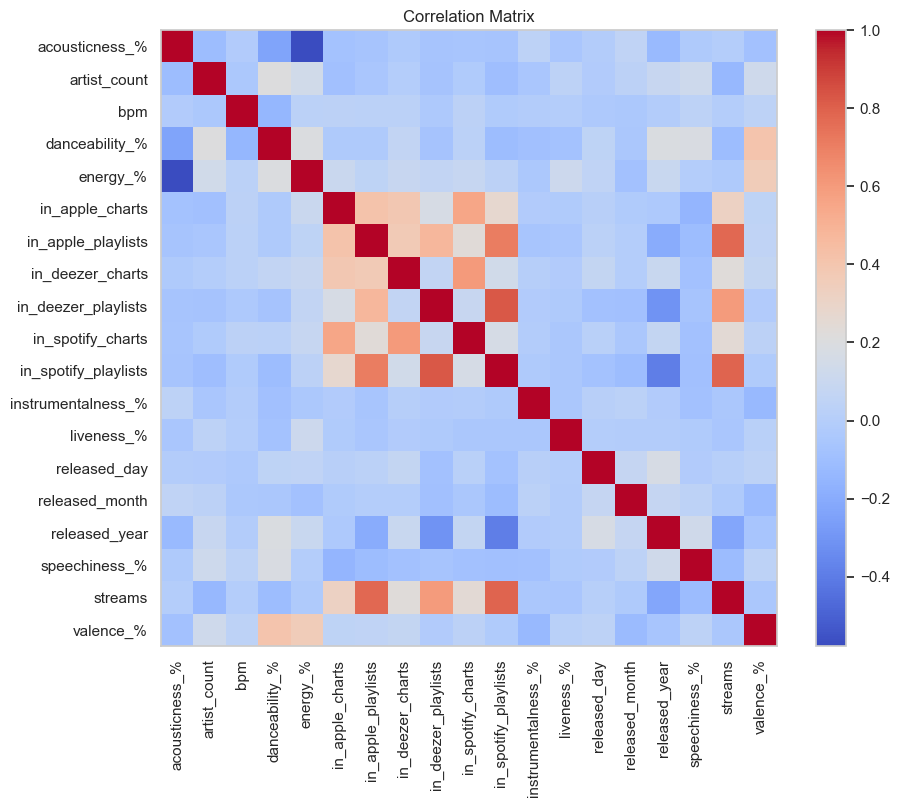

In [385]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.grid(False)
plt.show()

## Queries

Query 1: What are the top 10 danceability songs released in 2023?


In [386]:
top_danceability_songs_2023 = df_copy[df_copy['released_year'] == 2023].nlargest(10, 'danceability_%')
top_danceability_songs_2023[['track_name', 'artists', 'danceability_%']]

,track_name,artists,danceability_%
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",93
266,Shorty Party,"Cartel De Santa, La Kelly",93
5,Sprinter,"Dave, Central Cee",92
52,AMARGURA,Karol G,92
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",92
241,Cupido,Tini,91
272,Princess Diana (with Nicki Minaj),"Nicki Minaj, Ice Spice",90
315,If We Ever Broke Up,Mae Stephens,90
205,S-Class,Stray Kids,89
18,Classy 101,"Feid, Young Miko",86


Query 2: Density Distribution of Release Date of Songs

In [387]:
df_with_datetime = df_copy.copy()

df_with_datetime['release_date'] = pd.to_datetime(df_with_datetime[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

df_with_datetime[['track_name','release_date']]

,track_name,release_date
0,Seven (feat. Latto) (Explicit Ver.),2023-07-14
1,LALA,2023-03-23
2,vampire,2023-06-30
3,Cruel Summer,2019-08-23
4,WHERE SHE GOES,2023-05-18
...,...,...
944,My Mind & Me,2022-11-03
945,Bigger Than The Whole Sky,2022-10-21
946,A Veces (feat. Feid),2022-11-03
947,En La De Ella,2022-10-20


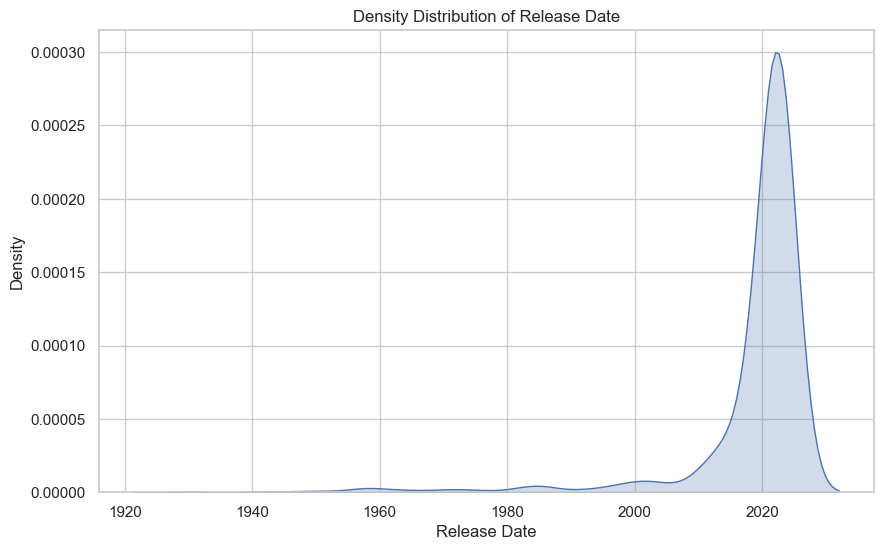

In [388]:
#Kernel Density Estimate

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(df_with_datetime['release_date'], fill=True)

plt.xlabel('Release Date')
plt.ylabel('Density')
plt.title('Density Distribution of Release Date')

plt.show()

### Splitting the track for multiple artist

In [389]:
df_split_artists = df_copy.assign(artists=df_copy['artists'].str.split(',')).explode('artists')
df_split_artists = df_split_artists.drop_duplicates(subset=['artists', 'track_name'])
df_split_artists = df_split_artists.apply(lambda x: x.str.strip() if x.dtype == "O" else x)
df_split_artists.reset_index(drop=True, inplace=True)
df_split_artists.to_csv('artist_split.csv')
df_split_artists

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
1473,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
1474,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
1475,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


Query 3: Most Streamed Artists of 2023

In [390]:
artist_streams = df_split_artists.groupby('artists')['streams'].sum()
artist_streams = artist_streams.sort_values(ascending=False)
df_artist_streams = pd.DataFrame(artist_streams)
df_artist_streams

,streams
artists,
Bad Bunny,23813527270
The Weeknd,23497058423
Ed Sheeran,15316587718
Taylor Swift,14630378183
Harry Styles,11608645649
...,...
Toian,32761689
Beam,32761689
DJ 900,11956641


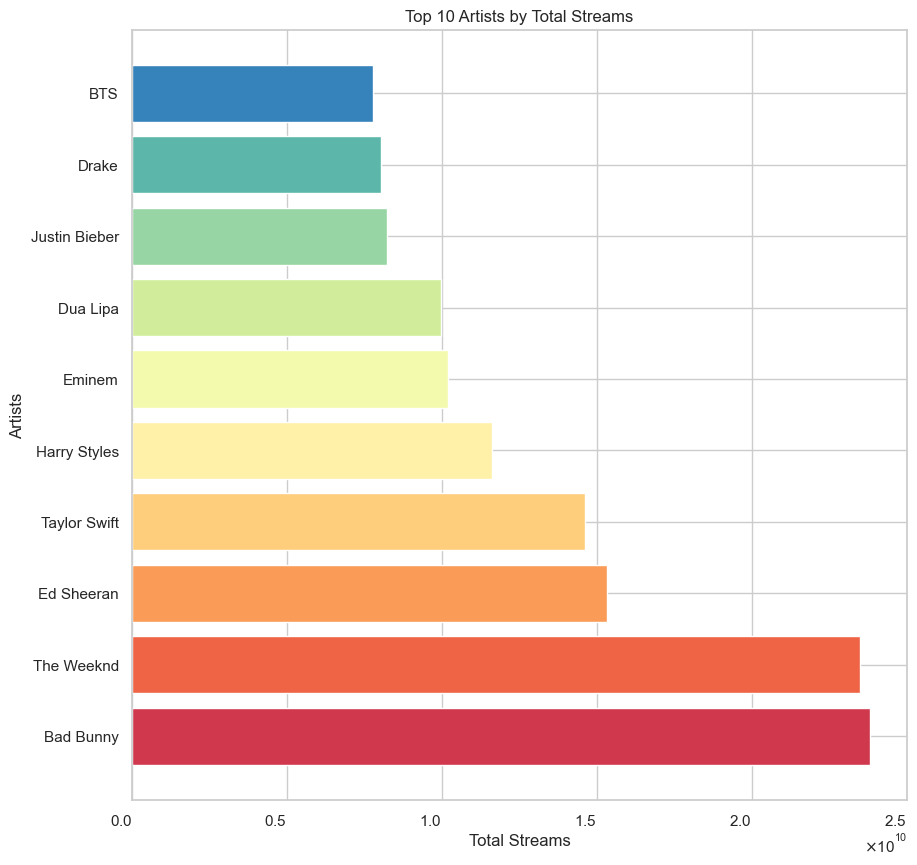

In [391]:
plt.figure(figsize=(10,10))
data = df_artist_streams.head(10)

colors = sns.color_palette("Spectral", n_colors=10)

plt.barh(data.index, data['streams'], color = colors)

plt.xticks(ha='right')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


plt.ylabel('Artists')
plt.xlabel('Total Streams')
plt.title('Top 10 Artists by Total Streams')

plt.show()

Query 4: Artists present in most playlists

In [392]:
artist_playlists = df_split_artists.groupby('artists')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()

artist_playlists = artist_playlists.sum(axis=1).sort_values(ascending=False)

df_artist_playlists = pd.DataFrame({'Total_Playlists': artist_playlists})
df_artist_playlists

,Total_Playlists
artists,
The Weeknd,241666
Eminem,180355
Ed Sheeran,162567
Taylor Swift,142855
Bad Bunny,142461
...,...
Sukriti Kakar,153
Mahalini,138
Colde,115


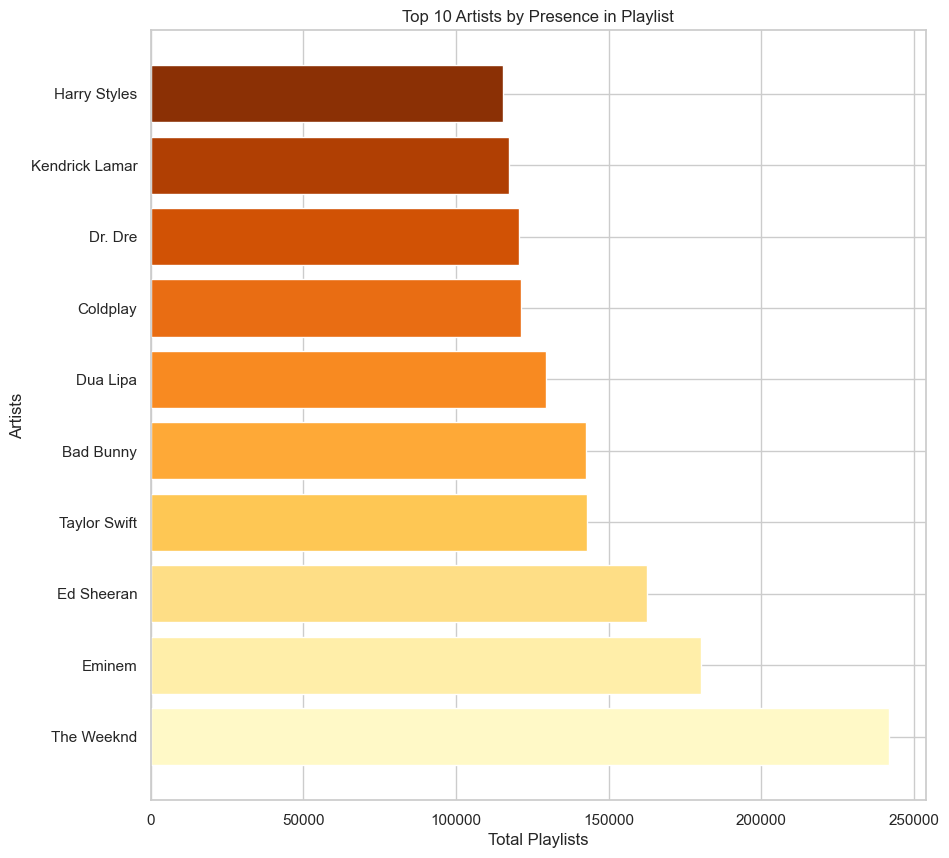

In [393]:
plt.figure(figsize=(10, 10))

colors = sns.color_palette("YlOrBr", n_colors=10)

data = df_artist_playlists.head(10)

plt.barh(data.index, data['Total_Playlists'], color = colors)
plt.xlabel('Total Playlists')
plt.ylabel('Artists')
plt.title('Top 10 Artists by Presence in Playlist')
plt.show()


Query 5: Average Attributes of Songs of Top 15 Artists

In [394]:
top_artists = list(df_artist_streams.reset_index().nlargest(15, 'streams')['artists'])

artists_data = df_split_artists[df_split_artists['artists'].isin(top_artists)].copy()
artists_data['artists'] = pd.Categorical(artists_data['artists'], categories=top_artists, ordered=True)
average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()
average_attributes.sort_index()

C:\Users\Aasim\AppData\Local\Temp\ipykernel_11772\3939308473.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()


,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artists,,,,,,,
Bad Bunny,74.425000,50.700000,69.125000,23.725000,1.575000,19.550000,11.275000
The Weeknd,59.805556,43.388889,63.444444,20.694444,1.000000,20.888889,8.166667
Ed Sheeran,71.428571,55.642857,63.142857,32.571429,0.000000,17.500000,5.142857
Taylor Swift,59.973684,34.157895,55.157895,31.473684,0.605263,16.657895,7.026316
Harry Styles,61.352941,54.000000,58.882353,42.823529,1.588235,14.294118,5.352941
Eminem,79.666667,47.222222,74.111111,6.444444,0.000000,22.555556,16.444444
Dua Lipa,75.666667,74.222222,80.333333,6.111111,0.000000,15.666667,9.000000
Justin Bieber,68.142857,57.857143,63.285714,31.285714,0.000000,21.571429,12.714286
Drake,73.684211,30.526316,54.684211,5.526316,0.105263,23.105263,19.947368


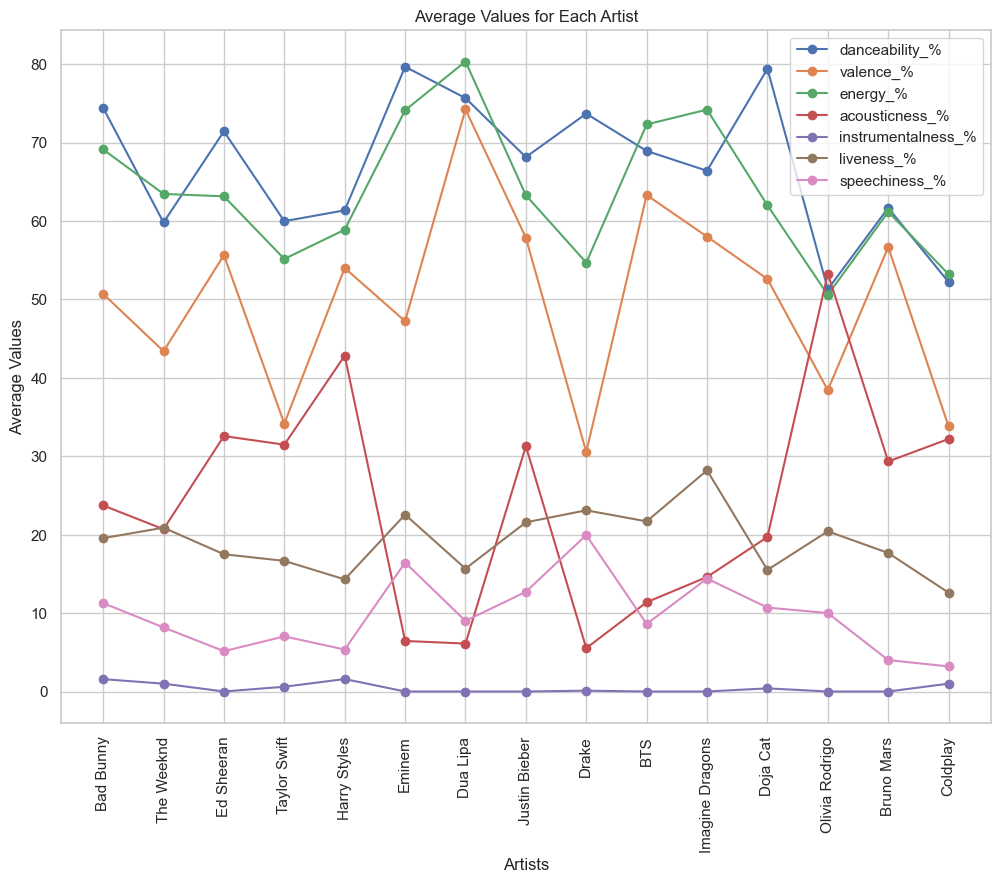

In [395]:
average_attributes.plot(kind='line', marker='o', figsize=(12, 9))

plt.xlabel('Artists')
plt.ylabel('Average Values')
plt.title('Average Values for Each Artist')
plt.xticks(rotation = 90)
plt.xticks(range(len(average_attributes.index)), average_attributes.index)

plt.show()

Query 6: Most Streamed Songs of 2023

In [396]:
top_songs_by_streams = df_copy.nlargest(15, 'streams')
top_songs_by_streams[['track_name', 'artists', 'streams']]

,track_name,artists,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
618,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
723,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


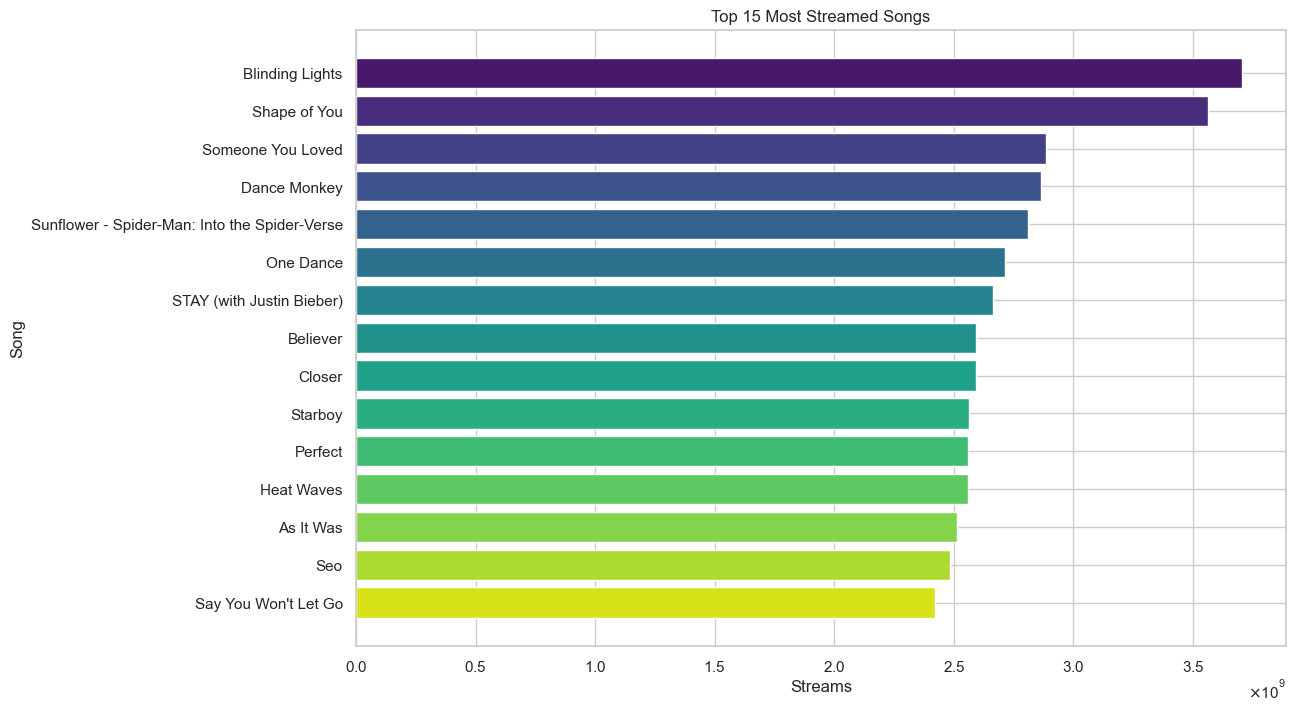

In [397]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("viridis", n_colors=15)

plt.barh(top_songs_by_streams['track_name'], top_songs_by_streams['streams'], color = colors)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.xlabel('Streams')
plt.ylabel('Song')
plt.title('Top 15 Most Streamed Songs')
plt.gca().invert_yaxis()
plt.show()


Query 7: Number of Songs Released by Each Artist

In [398]:
most_songs_artists = df_split_artists['artists'].value_counts()
most_songs_artists = pd.DataFrame(most_songs_artists)
most_songs_artists


,count
artists,
Bad Bunny,40
Taylor Swift,38
The Weeknd,36
Kendrick Lamar,23
SZA,23
...,...
La Joaqui,1
Steve Aoki,1
FIFA Sound,1


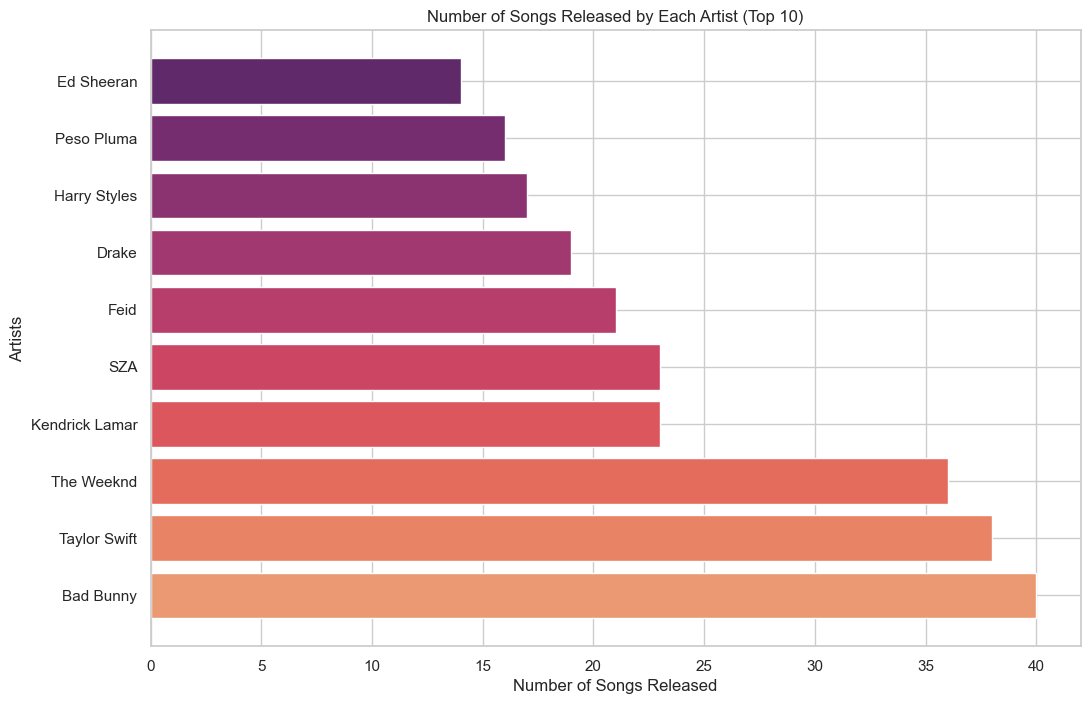

In [399]:
plt.figure(figsize=(12, 8))

colors = sns.color_palette("flare", n_colors=10)

data = most_songs_artists.head(10)

plt.barh(data.index, data['count'], color=colors)

plt.xlabel('Number of Songs Released')
plt.ylabel('Artists')
plt.title('Number of Songs Released by Each Artist (Top 10)')
plt.show()

Query 8: Musical Feature Evolution Over the Years

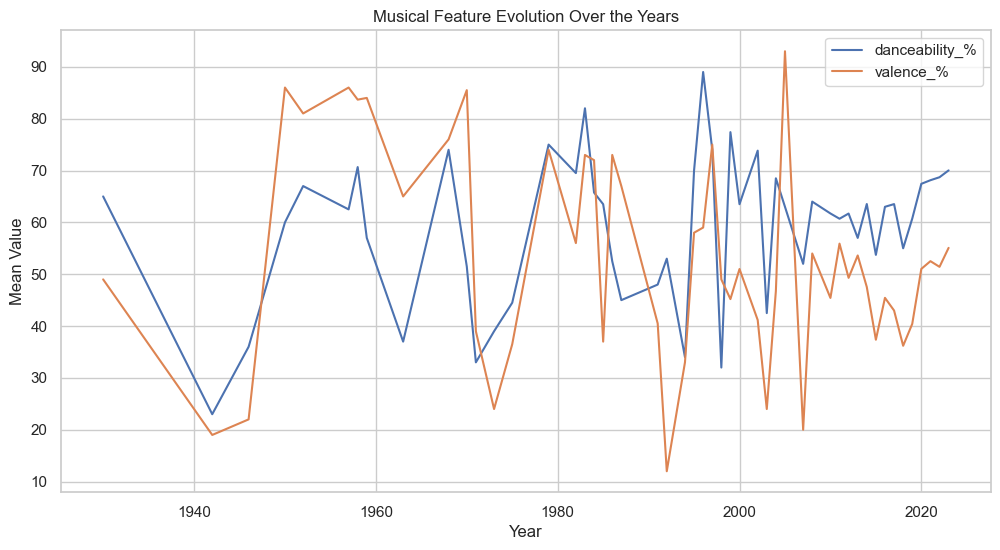

In [400]:
df_copy['released_year'] = pd.to_datetime(df_copy['released_year'], format='%Y')

features_to_analyze = ['danceability_%', 'valence_%' ]
mean_features_by_year = df_copy.groupby('released_year')[features_to_analyze].mean().reset_index()

plt.figure(figsize=(12, 6))

for feature in features_to_analyze:
    sns.lineplot(data=mean_features_by_year, x='released_year', y=feature, label=feature)

plt.title('Musical Feature Evolution Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

Query 9: Top Songs by Playlist

In [401]:
N = 10

top_spotify_songs = df_copy.nlargest(N, 'in_spotify_playlists')
top_apple_songs = df_copy.nlargest(N, 'in_apple_playlists')
top_deezer_songs = df_copy.nlargest(N, 'in_deezer_playlists')

print("Top Spotify Songs:")
print(top_spotify_songs[['track_name', 'in_spotify_playlists']].to_string(index=False))

print("\nTop Apple Music Songs:")
print(top_apple_songs[['track_name', 'in_apple_playlists']].to_string(index=False))

print("\nTop Deezer Songs:")
print(top_deezer_songs[['track_name', 'in_deezer_playlists']].to_string(index=False))


Top Spotify Songs:
                               track_name  in_spotify_playlists
                   Get Lucky - Radio Edit                 52898
                           Mr. Brightside                 51979
                  Wake Me Up - Radio Edit                 50887
Smells Like Teen Spirit - Remastered 2021                 49991
                               Take On Me                 44927
                          Blinding Lights                 43899
                                One Dance                 43257
             Somebody That I Used To Know                 42798
        Everybody Wants To Rule The World                 41751
                      Sweet Child O' Mine                 41231

Top Apple Music Songs:
               track_name  in_apple_playlists
          Blinding Lights                 672
 One Kiss (with Dua Lipa)                 537
             Dance Monkey                 533
          Don't Start Now                 532
STAY (with Justin Biebe

Query 10: Average Audio Features for Top and Lowest 10 Songs by Streams

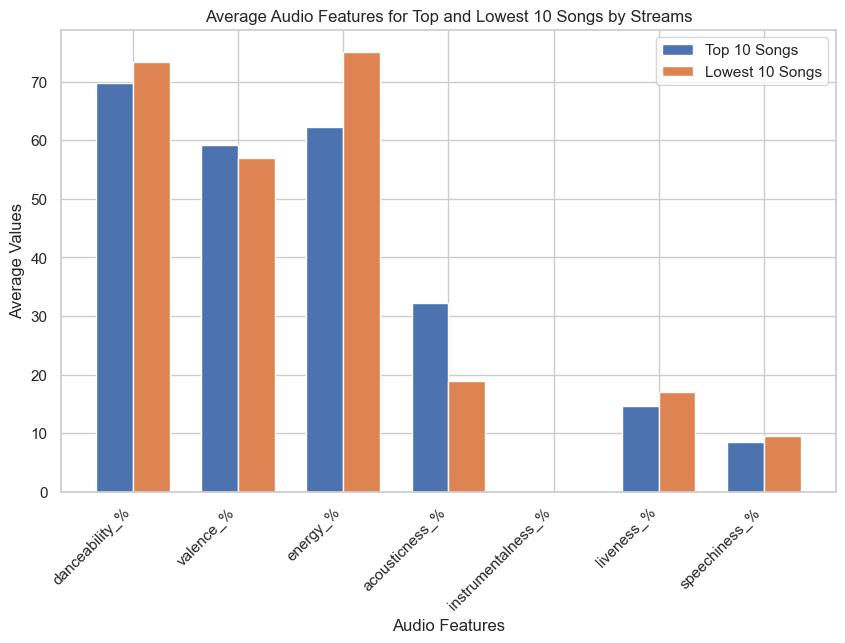

In [402]:
top_10_songs = df_copy.nlargest(10, 'streams')
lowest_10_songs = df_copy.nsmallest(10, 'streams')

columns_to_average = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

top_10_average = top_10_songs[columns_to_average].mean()
lowest_10_average = lowest_10_songs[columns_to_average].mean()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

bar_positions_top = range(len(top_10_average))
bar_positions_lowest = [pos + bar_width for pos in bar_positions_top]

ax.bar(bar_positions_top, top_10_average, width=bar_width, label='Top 10 Songs')
ax.bar(bar_positions_lowest, lowest_10_average, width=bar_width, label='Lowest 10 Songs')

ax.set_xlabel('Audio Features')
ax.set_ylabel('Average Values')
ax.set_title('Average Audio Features for Top and Lowest 10 Songs by Streams')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_top])
ax.set_xticklabels(columns_to_average, rotation=45, ha='right')
ax.legend()

plt.show()


Query 11: Relationship between Streams and Average Danceability

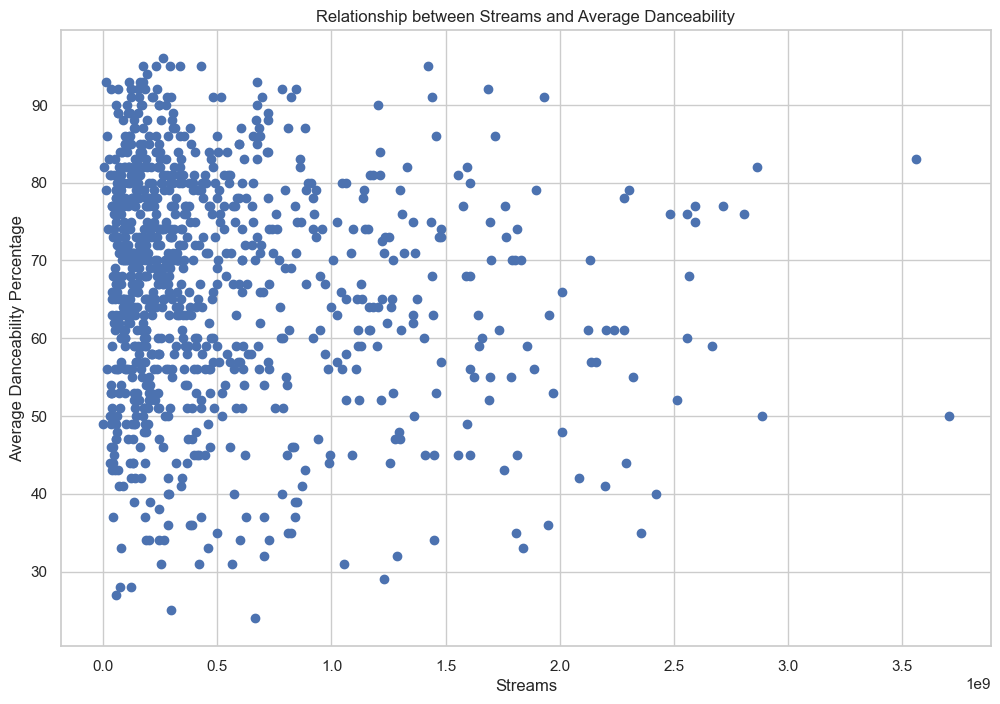

In [403]:

# Group by streams and calculate the average danceability percentage
average_danceability = df_copy.groupby('streams')['danceability_%'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 8))
plt.scatter(average_danceability['streams'], average_danceability['danceability_%'])

# Set labels and title
plt.xlabel('Streams')
plt.ylabel('Average Danceability Percentage')
plt.title('Relationship between Streams and Average Danceability')

# Show the plot
plt.show()



Query 12: Distribution of Songs by Mode

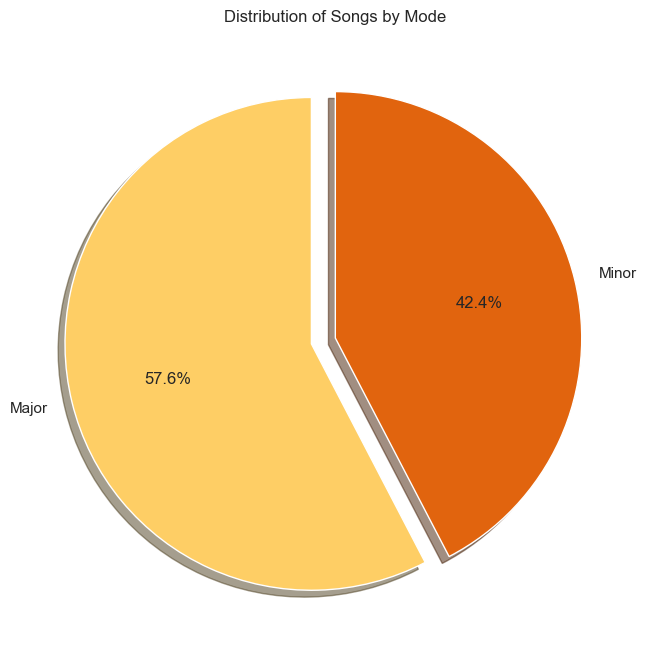

In [404]:
# Assuming df is your DataFrame
mode_counts = df_copy['mode'].value_counts()

# Define a bright color palette
colors = sns.color_palette('YlOrBr', n_colors=len(mode_counts))

# Explode a slice to highlight
explode = [0.1] + [0] * (len(mode_counts) - 1)  # explode the first slice

# Plot a pie chart with styling
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Songs by Mode')
plt.show()

Query 13: Mean Valence for Major and Minor Modes

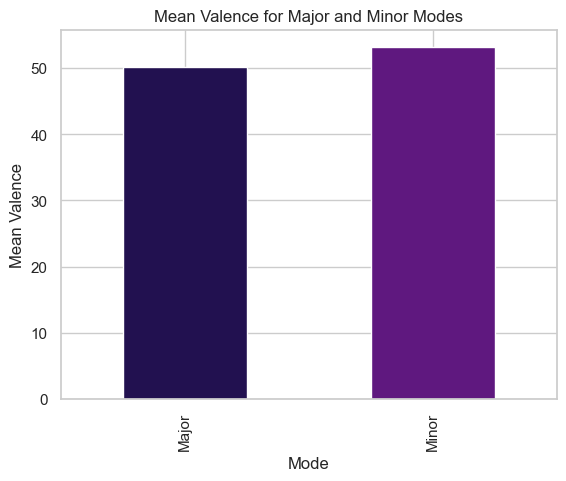

In [405]:
mode_valence_means = df_copy.groupby('mode')['valence_%'].mean()

colors = sns.color_palette("magma")

mode_valence_means.plot(kind='bar', color = colors)

plt.xlabel('Mode')
plt.ylabel('Mean Valence')
plt.title('Mean Valence for Major and Minor Modes')

plt.show()

Query 14: Single Artist v Multiple Artists

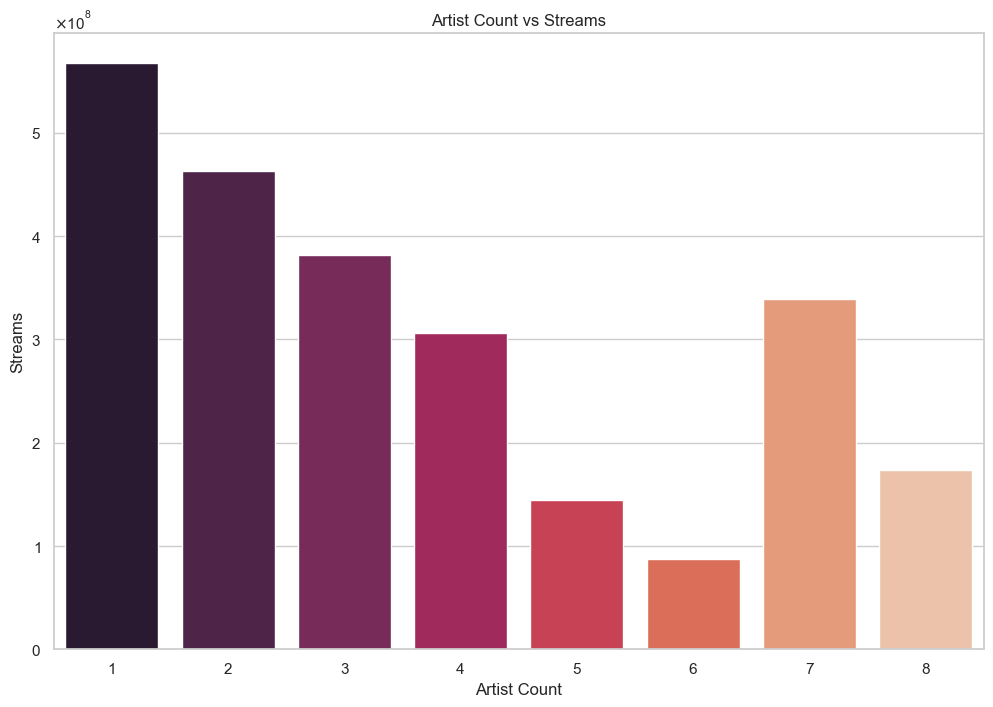

In [406]:
df_artist_count = df_copy.groupby('artist_count')['streams'].mean().reset_index()

colors = sns.color_palette("rocket", n_colors=len(df_artist_count))


plt.figure(figsize=(12, 8))
sns.barplot(x='artist_count', y='streams', data=df_artist_count, palette=colors, hue='artist_count', legend=False)


plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.title('Artist Count vs Streams')

plt.show()

Query 15: Visualisation of Streams and Count

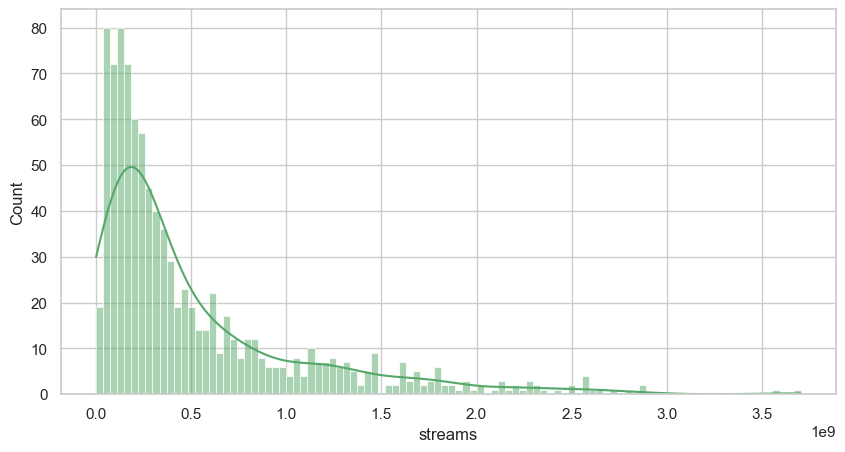

In [407]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df_copy['streams'], color='g',bins=100, kde=True)

plt.show()

Query :

59.2
57.0


<Axes: xlabel='l10tracks'>

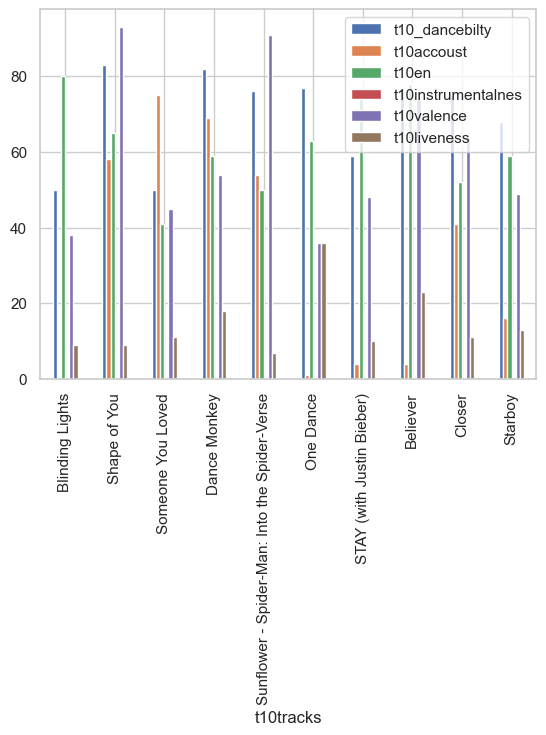

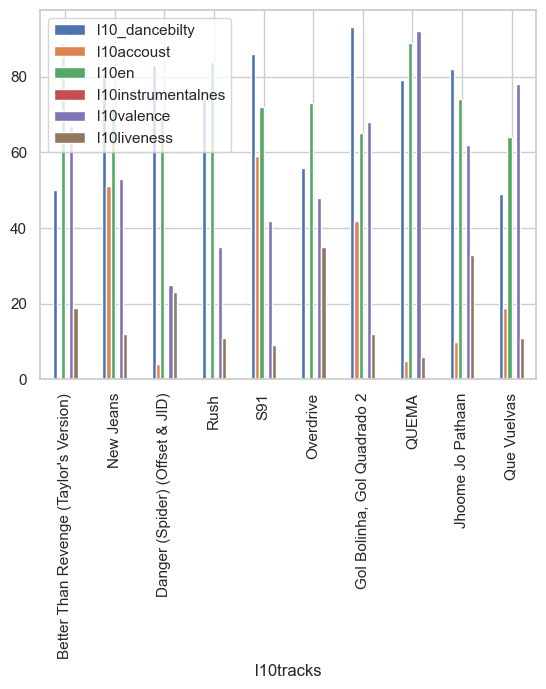

In [408]:
# # from statistics import mean

# streams_sorted = df_copy.sort_values(by='streams', ascending=False)
# df_t10=streams_sorted.head(10)
# df_l10=streams_sorted.tail(10)


# df_merge={
#      "t10_dancebilty":list(df_t10['danceability_%']),
#      "l10_dancebilty":list(df_l10['danceability_%']),
#      "t10tracks":list(df_t10['track_name']),
#      "l10tracks":list(df_l10['track_name']),
#      "t10accoust":list(df_t10['acousticness_%']),
#      "l10accoust":list(df_l10['acousticness_%']),
#      "t10en":list(df_t10['energy_%']),
#      "l10en":list(df_l10['energy_%']),
#      "t10instrumentalnes":list(df_t10['instrumentalness_%']),
#      "l10instrumentalnes":list(df_l10['instrumentalness_%']),
#      "t10valence":list(df_t10['valence_%']),
#      "l10valence":list(df_l10['valence_%']),
#      "t10liveness":list(df_t10["liveness_%"]),
#      "l10liveness":list(df_l10["liveness_%"]),
#      }

# a=df_merge["t10valence"]
# val_meant10=np.mean(a)
# print(val_meant10)

# b=df_merge["l10valence"]
# val_meanl10=np.mean(b)
# print(val_meanl10)

# dfm=pd.DataFrame(df_merge)
# dfm

# dfm.plot(kind="bar",x="t10tracks",y=["t10_dancebilty","t10accoust","t10en","t10instrumentalnes","t10valence","t10liveness"])

# dfm.plot(kind="bar",x="l10tracks",y=["l10_dancebilty","l10accoust","l10en","l10instrumentalnes","l10valence","l10liveness"])
# #x_label=['t10_valence','l10_valence']
# #dfm.plot(kind="bar",x=x_label,y=[val_meant10,val_meanl10])


# #dfm.plot(kind="line",x="t10tracks",y=["l10valence"])